In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

## load the data

### action

In [5]:
# last column in action_filttune is the origin in filttune

action_CST_500 = np.loadtxt('data/action_in_CST_matrix_rand_seed500.csv',delimiter=',')
action_filttune_full_500 = np.loadtxt('data/action_in_filttune_matrix_19_seed500.csv',delimiter=',')

action_CST_900 = np.loadtxt('data/action_in_CST_matrix_rand_seed900.csv',delimiter=',')
action_filttune_full_900 = np.loadtxt('data/action_in_filttune_matrix_19_seed900.csv',delimiter=',')

action_CST_1000 = np.loadtxt('data/action_in_CST_matrix_rand_seed1000.csv',delimiter=',')
action_filttune_full_1000 = np.loadtxt('data/action_in_filttune_matrix_19_seed1000.csv',delimiter=',')

action_CST_1100 = np.loadtxt('data/action_in_CST_matrix_rand_seed1100.csv',delimiter=',')
action_filttune_full_1100 = np.loadtxt('data/action_in_filttune_matrix_19_seed1100.csv',delimiter=',')

In [6]:
action_filttune_500 = action_filttune_full_500[:,0:3201]

action_filttune_900  = action_filttune_full_900[:,0:1083]
action_filttune_1000 = action_filttune_full_1000[:,0:1068]
action_filttune_1100 = action_filttune_full_1100[:,0:2910]

## load the RMSE data

In [7]:
#load the RMSE data.
#1st row: rmse; 2nd row: mrse
RMS_500  = np.loadtxt('data/RMS_seed500.csv',delimiter=',')
RMS_900  = np.loadtxt('data/RMS_seed900.csv',delimiter=',')
RMS_1000 = np.loadtxt('data/RMS_seed1000.csv',delimiter=',')
RMS_1100 = np.loadtxt('data/RMS_seed1100.csv',delimiter=',')

## Augument the data

## Seed 500 complete

In [6]:
X_train_500, X_test_500, y_train_500, y_test_500 = train_test_split( action_CST_500.transpose(), 
                                                                    action_filttune_500.transpose(), random_state=1,train_size = 0.8)

#### build the model and train

In [ ]:
'activation': 'relu',
 'alpha': 0.05,
 'batch_size': 'auto',
 'hidden_layer_sizes': (300, 300, 300),
 'learning_rate': 'adaptive',
 'solver': 'adam'

In [8]:
from tensorflow.keras.models import Sequential,load_model, clone_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2, l1, l1_l2

from livelossplot import PlotLossesKeras

from tensorflow.keras.models import Sequential,load_model, clone_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2, l1, l1_l2

from livelossplot import PlotLossesKeras

##### so far the best with test

In [10]:
model_comp_small_1 = load_model('model/model_comp_small_1.h5')

2021-09-27 10:20:11.397569: W tensorflow/compiler/xla/service/platform_util.cc:276] unable to create StreamExecutor for CUDA:0: failed initializing StreamExecutor for CUDA device ordinal 0: Internal: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 15843721216
2021-09-27 10:20:11.397733: I tensorflow/compiler/jit/xla_gpu_device.cc:136] Ignoring visible XLA_GPU_JIT device. Device number is 0, reason: Internal: no supported devices found for platform CUDA
2021-09-27 10:20:11.398033: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-27 10:20:11.398296: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

##### try to save according to val_loss and less regularization

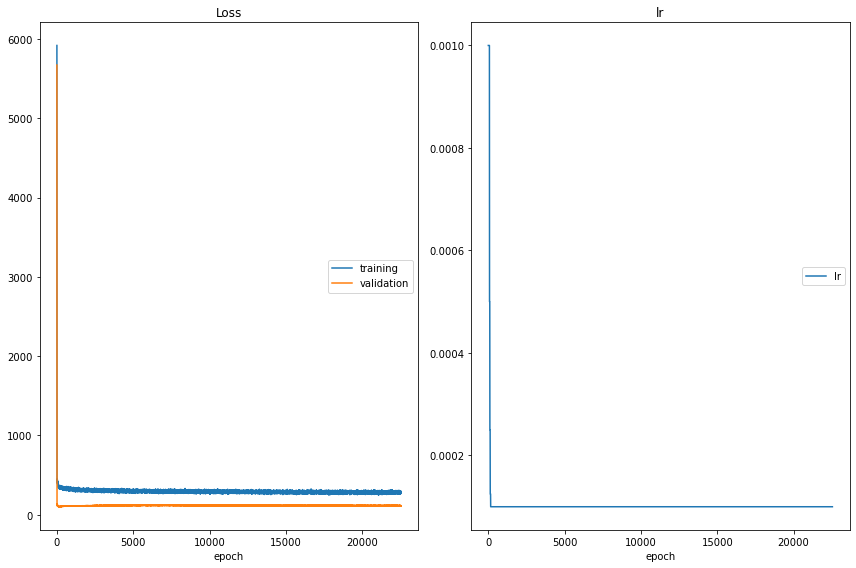

Loss
	training         	 (min:  246.492, max: 5918.446, cur:  279.245)
	validation       	 (min:  101.636, max: 5671.478, cur:  112.278)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
4852/4852 [==============================] - 1s 244us/sample - loss: 279.2453 - val_loss: 112.2779
Epoch 22539/60000
4644/4852 [===========================>..] - ETA: 0s - loss: 275.0081
Epoch 22539: val_loss did not improve from 101.63629


In [ ]:
# Set the input shape
input_shape = (19,)

# Create the model
model_small_2 = Sequential()
model_small_2.add(Dense(500, input_shape=input_shape, activation='relu', 
                        kernel_regularizer=regularizers.l2(0.002)))
model_small_2.add(Dropout(0.1))
model_small_2.add(BatchNormalization())
model_small_2.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_small_2.add(Dropout(0.1))
model_small_2.add(BatchNormalization())
model_small_2.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_small_2.add(Dropout(0.1))
model_small_2.add(BatchNormalization())
model_small_2.add(Dense(19, activation='linear', kernel_regularizer=regularizers.l2(0.001)))

# Configure the model and start training
model_small_2.compile(loss='mse', optimizer='adam')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=0.0001)
tbCallback = TensorBoard(log_dir='./logs')
filepath = "model/model_comp_small_2.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, reduce_lr, PlotLossesKeras()]

model_small_2.fit(X_train_small, y_train_small, epochs=60000, 
                  batch_size = 36, verbose=1, validation_data = (X_test_small,y_test_small), #validation_split=0.2,
                  callbacks=callbacks_list)

#### MSE and R2 score

In [46]:
y_train_predict_small = model_small_1.predict(X_train_small)
y_test_predict_small = model_small_1.predict(X_test_small)

In [47]:
mse_train_small = metrics.mean_squared_error(y_train_small, y_train_predict_small)
mse_test_small = metrics.mean_squared_error(y_test_small, y_test_predict_small)

r2_train_small = r2_score(y_train_small, y_train_predict_small)
r2_test_small = r2_score(y_test_small, y_test_predict_small)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE train is {}'.format(mse_train_small))
print('MSE test is {}'.format(mse_test_small))
print('R2 train is {}'.format(r2_train_small))
print('R2 test is {}'.format(r2_test_small))

The model performance for testing set
--------------------------------------
MSE train is 75.63137253313666
MSE test is 110.15527389265652
R2 train is 0.8127652251160864
R2 test is 0.7687341431969538
